In [1]:
!pip install tensorflow numpy pandas matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

2025-10-15 13:30:03.396968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-15 13:30:03.400060: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-15 13:30:03.556787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-15 13:30:04.726007: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [16]:
np.random.seed(0)
t = np.linspace(0, 100, 500)
y = np.sin(t) + np.random.normal(0, 0.1, 500)

train_size = int(0.8 * len(t))
train_data, test_data = y[:train_size], y[train_size:]

# Define a function to create sequences for training
def create_sequences(data, seq_length, forecast_horizon):
    sequences = []
    target = []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length: i+seq_length+forecast_horizon])
    return np.array(sequences), np.array(target)

seq_length = 10
forecast_horizon = 10
X_train, y_train = create_sequences(train_data, seq_length, forecast_horizon)
X_test, y_test = create_sequences(test_data, seq_length, forecast_horizon)

In [17]:
X_train.shape, y_train.shape

((381, 10), (381, 10))

In [18]:
# Reshape the input data for the CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
X_train.shape, X_test.shape

((381, 10, 1), (81, 10, 1))

In [21]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', 
input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10))  # Output layer for regression

/home/redninjale/AFTAC-DL/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
# Mean Squared Error for regression
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, 
y_test), verbose=2)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/50
24/24 - 1s - 22ms/step - loss: 0.2896 - val_loss: 0.1160
Epoch 2/50
24/24 - 0s - 4ms/step - loss: 0.0418 - val_loss: 0.0240
Epoch 3/50
24/24 - 0s - 4ms/step - loss: 0.0173 - val_loss: 0.0179
Epoch 4/50
24/24 - 0s - 4ms/step - loss: 0.0144 - val_loss: 0.0172
Epoch 5/50
24/24 - 0s - 4ms/step - loss: 0.0143 - val_loss: 0.0166
Epoch 6/50
24/24 - 0s - 4ms/step - loss: 0.0136 - val_loss: 0.0160
Epoch 7/50
24/24 - 0s - 4ms/step - loss: 0.0135 - val_loss: 0.0161
Epoch 8/50
24/24 - 0s - 4ms/step - loss: 0.0134 - val_loss: 0.0161
Epoch 9/50
24/24 - 0s - 4ms/step - loss: 0.0133 - val_loss: 0.0168
Epoch 10/50
24/24 - 0s - 4ms/step - loss: 0.0131 - val_loss: 0.0160
Epoch 11/50
24/24 - 0s - 4ms/step - loss: 0.0131 - val_loss: 0.0164
Epoch 12/50
24/24 - 0s - 4ms/step - loss: 0.0130 - val_loss: 0.0161
Epoch 13/50
24/24 - 0s - 4ms/step - loss: 0.0129 - val_loss: 0.0167
Epoch 14/50
24/24 - 0s - 4ms/step - loss: 0.0131 - val_loss: 0.0158
Epoch 15/50
24/24 - 0s - 4ms/step - loss: 0.0127 - val_l

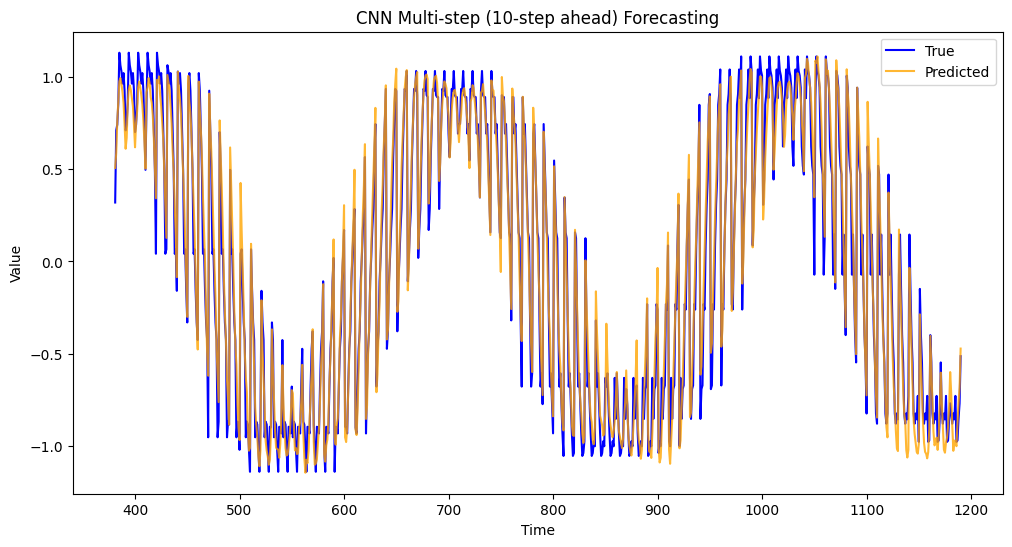

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# y_test: shape (num_samples, 10)
# y_pred: shape (num_samples, 10)

plt.figure(figsize=(12, 6))

# Flatten test data for comparison (true future values)
true_values = y_test.flatten()
pred_values = y_pred.flatten()

# Build a timeline that matches the test portion of your data
time_axis = np.arange(len(y_train), len(y_train) + len(true_values))

plt.plot(time_axis, true_values, label='True', color='blue')
plt.plot(time_axis, pred_values, label='Predicted', color='orange', alpha=0.8)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('CNN Multi-step (10-step ahead) Forecasting')
plt.show()
